In [231]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv('./AWCustomers.csv')
df1 = pd.read_csv('./AWSales.csv')
df1.head()

,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


In [289]:
df = pd.merge(df, df1, on='CustomerID')
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,M,S,1,1,0,0,51804,2017-03-06,1,55.41


In [290]:
df.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18361 entries, 0 to 18360
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            18361 non-null  int64  
 1   Title                 101 non-null    object 
 2   FirstName             18361 non-null  object 
 3   MiddleName            10572 non-null  object 
 4   LastName              18361 non-null  object 
 5   Suffix                3 non-null      object 
 6   AddressLine1          18361 non-null  object 
 7   AddressLine2          311 non-null    object 
 8   City                  18361 non-null  object 
 9   StateProvinceName     18361 non-null  object 
 10  CountryRegionName     18361 non-null  object 
 11  PostalCode            18361 non-null  object 
 12  PhoneNumber           18361 non-null  object 
 13  BirthDate             18361 non-null  object 
 14  Education             18361 non-null  object 
 15  Occupation         

In [292]:
df.isnull().sum()

CustomerID                  0
Title                   18260
FirstName                   0
MiddleName               7789
LastName                    0
Suffix                  18358
AddressLine1                0
AddressLine2            18050
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
LastUpdated                 0
BikeBuyer                   0
AvgMonthSpend               0
dtype: int64

### Now as we can see from above information that we so much null values in Title middlename addressline2 etc so its good to remove them from df
secondly w'll also remove firstname, lastname, PhoneNumber etc field as buyer have nothing to do we with name

In [293]:
df.drop(['CustomerID', "Title", 'FirstName', 'MiddleName', 'LastName', 'AddressLine2', "Suffix"], axis=1,
        inplace=True)
df.head()

,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,7090 C. Mount Hood,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0115,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,3651 Willow Lake Rd,Shawnee,British Columbia,Canada,V9B 2C3,787-555-0136,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,1774 Tice Valley Blvd.,West Covina,California,United States,91791,120-555-0111,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,2103 Baldwin Dr,Liverpool,England,United Kingdom,L4 4HB,1 (11) 500 555-0167,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,Am Gallberg 234,Werne,Nordrhein-Westfalen,Germany,59368,1 (11) 500 555-0113,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06,1,55.41


#### Now lets check for unique values of fields to study the data

In [294]:
df.columns

Index(['AddressLine1', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'LastUpdated',
       'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

In [295]:
df.nunique()

AddressLine1            12742
City                      269
StateProvinceName          54
CountryRegionName           6
PostalCode                323
PhoneNumber              8836
BirthDate                8230
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             6
NumberChildrenAtHome        4
TotalChildren               4
YearlyIncome            15356
LastUpdated                 2
BikeBuyer                   2
AvgMonthSpend            1803
dtype: int64

Drop AddessLine1, PostalCode,StateProvinceName because they large amount of unique data

In [296]:
df.drop(['AddressLine1', 'PostalCode', 'StateProvinceName','PhoneNumber'], axis=1, inplace=True)
df.head()

,City,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,Wollongong,Australia,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,Shawnee,Canada,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,West Covina,United States,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,Liverpool,United Kingdom,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,Werne,Germany,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06,1,55.41


### let convert all unique categorical Data into numerical

In [297]:
df['CountryRegionName'] = pd.factorize(df['CountryRegionName'])[0]
df['City'] = pd.factorize(df['City'])[0]
df['Education'] = pd.factorize(df['Education'])[0]
df['Occupation'] = pd.factorize(df['Occupation'])[0]
df['Gender'] = pd.factorize(df['Gender'])[0]
df['MaritalStatus'] = pd.factorize(df['MaritalStatus'])[0]


In [298]:
df.columns

Index(['City', 'CountryRegionName', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'LastUpdated',
       'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

Sales have nothing to do with month or day of birth of customer but we can used year as there are chances that this particular age group can buy bike

In [299]:
df['BirthDate']= pd.to_datetime(df['BirthDate'])

import datetime
currentTime = datetime.datetime.now()
def get_age(birth_date,today=currentTime):
    y=today-birth_date
    return y.days//365

df['Age']=df['BirthDate'].apply(lambda x: get_age(x))

df.drop(['BirthDate'],axis=1,inplace=True)

df.head()

,City,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend,Age
0,0,0,0,0,0,0,1,3,0,1,81916,2017-03-06,1,50.97,34
1,1,1,1,0,0,0,1,2,1,2,81076,2017-03-06,1,53.11,50
2,2,2,0,0,1,1,0,3,0,0,86387,2017-03-06,1,54.08,36
3,3,3,1,1,0,0,1,2,1,2,61481,2017-03-06,1,56.93,44
4,4,4,1,1,0,1,1,1,0,0,51804,2017-03-06,1,55.41,47


In [300]:
df.drop('LastUpdated',inplace=True,axis=1)

In [301]:
df.nunique()

City                      269
CountryRegionName           6
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             6
NumberChildrenAtHome        4
TotalChildren               4
YearlyIncome            15356
BikeBuyer                   2
AvgMonthSpend            1803
Age                        72
dtype: int64

### Now let find relations between data

In [302]:
df.corr()

,City,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
City,1.000000,0.001239,-0.009386,0.001523,-0.015282,0.001673,-0.008938,0.005149,-0.009525,-0.004055,0.004228,-0.001214,0.005843,-0.017974
CountryRegionName,0.001239,1.000000,0.063624,-0.032256,-0.000521,0.051352,-0.045409,-0.031197,-0.004841,-0.007766,-0.060628,-0.016616,-0.010695,0.008521
Education,-0.009386,0.063624,1.000000,0.105244,0.003702,0.009822,0.006594,-0.035596,-0.011119,0.000168,-0.013467,-0.040062,-0.051131,0.018449
Occupation,0.001523,-0.032256,0.105244,1.000000,0.000673,-0.036190,0.181713,0.097833,0.004462,0.009560,0.436306,-0.005817,0.119602,0.021978
Gender,-0.015282,-0.000521,0.003702,0.000673,1.000000,0.042809,-0.009935,-0.003541,-0.014645,-0.030360,0.000354,-0.116036,-0.310572,0.002670
MaritalStatus,0.001673,0.051352,0.009822,-0.036190,0.042809,1.000000,-0.442841,-0.051823,-0.471534,-0.750911,-0.048784,-0.189371,0.070198,-0.197888
HomeOwnerFlag,-0.008938,-0.045409,0.006594,0.181713,-0.009935,-0.442841,1.000000,0.209787,0.368459,0.578197,0.356243,0.229115,0.290785,0.642200
NumberCarsOwned,0.005149,-0.031197,-0.035596,0.097833,-0.003541,-0.051823,0.209787,1.000000,0.020393,0.030430,0.477300,0.185078,0.275378,0.041343
NumberChildrenAtHome,-0.009525,-0.004841,-0.011119,0.004462,-0.014645,-0.471534,0.368459,0.020393,1.000000,0.606077,0.005990,0.359777,0.145177,0.326315
TotalChildren,-0.004055,-0.007766,0.000168,0.009560,-0.030360,-0.750911,0.578197,0.030430,0.606077,1.000000,0.022014,0.209479,0.026138,0.547722


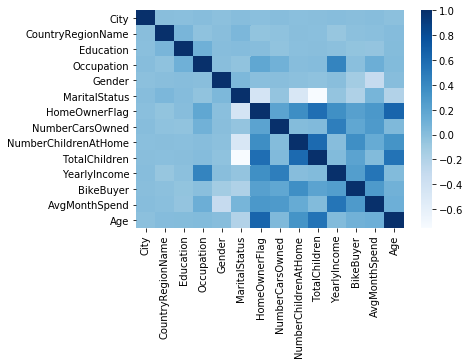

In [303]:
sb.heatmap(df.corr(),cmap="Blues")

##Standardization/Normalization


In [306]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled=scaler.fit_transform(df[['YearlyIncome','Age','AvgMonthSpend']])
df['YearlyIncome_scaled']=scaled[:,0]
df['Age_scaled']=scaled[:,1]
df['AvgMonthSpend_scaled']=scaled[:,2]
df.drop(['YearlyIncome','Age','AvgMonthSpend'],axis=1,inplace=True)

In [307]:
df.head()

,City,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,BikeBuyer,YearlyIncome_scaled,Age_scaled,AvgMonthSpend_scaled
0,0,0,0,0,0,0,1,3,0,1,1,0.496842,0.183099,0.324210
1,1,1,1,0,0,0,1,2,1,2,1,0.489453,0.408451,0.425201
2,2,2,0,0,1,1,0,3,0,0,1,0.536172,0.211268,0.470977
3,3,3,1,1,0,0,1,2,1,2,1,0.317083,0.323944,0.605474
4,4,4,1,1,0,1,1,1,0,0,1,0.231958,0.366197,0.533742


In [323]:
from scipy.spatial import distance

distance.cosine(df['Education'].values,df['AvgMonthSpend_scaled'].values)

0.3369737626324949

In [324]:
distance.jaccard(df['Education'].values,df['AvgMonthSpend_scaled'].values)

1.0

-0.009386065880279352